# Rubidium wavefunction and potential

In [ ]:
import logging

import matplotlib.pyplot as plt
import numpy as np

from rydstate.rydberg_state import RydbergStateAlkali

logging.basicConfig(level=logging.INFO, format="%(levelname)s %(filename)s: %(message)s")
logging.getLogger("rydstate").setLevel(logging.DEBUG)

In [2]:
state = RydbergStateAlkali("Rb", n=130, l=129, j=129.5)
state.radial.create_wavefunction()

turning_points = {
    "hydrogen": state.radial.model.calc_hydrogen_turning_point_z(state.n, state.l),
    "classical": state.radial.model.calc_turning_point_z(state.get_energy("a.u.")),
}

In [3]:
hydrogen = RydbergStateAlkali("H_textbook", n=state.n, l=state.l, j=state.j)
hydrogen.radial.create_model()
hydrogen.radial.create_wavefunction()

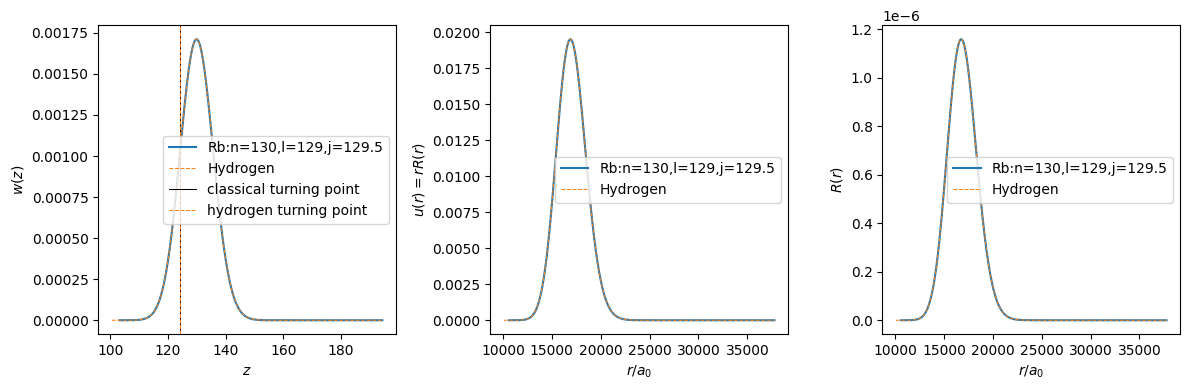

In [4]:
label = f"{state.species}:n={state.n},l={state.l},j={state.j}"
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

axs[0].plot(state.radial.grid.z_list, state.radial.wavefunction.w_list, "C0-", label=label)
axs[0].plot(hydrogen.radial.grid.z_list, hydrogen.radial.wavefunction.w_list, "C1--", lw=0.75, label="Hydrogen")
axs[0].set_xlabel(r"$z$")
axs[0].set_ylabel(r"$w(z)$")

axs[0].axvline(turning_points["classical"], color="k", ls="-", lw=0.75, label="classical turning point")
axs[0].axvline(turning_points["hydrogen"], color="C1", ls="--", lw=0.75, label="hydrogen turning point")
axs[0].legend()

axs[1].plot(state.radial.grid.x_list, state.radial.wavefunction.u_list, "C0-", label=label)
axs[1].plot(hydrogen.radial.grid.x_list, hydrogen.radial.wavefunction.u_list, "C1--", lw=0.75, label="Hydrogen")
axs[1].set_xlabel(r"$r / a_0$")
axs[1].set_ylabel(r"$u(r) = r R(r)$")
axs[1].legend()

axs[2].plot(state.radial.grid.x_list, state.radial.wavefunction.r_list, "C0-", label=label)
axs[2].plot(hydrogen.radial.grid.x_list, hydrogen.radial.wavefunction.r_list, "C1--", lw=0.75, label="Hydrogen")
axs[2].set_xlabel(r"$r / a_0$")
axs[2].set_ylabel(r"$R(r)$")
axs[2].legend()

fig.tight_layout()
plt.show()

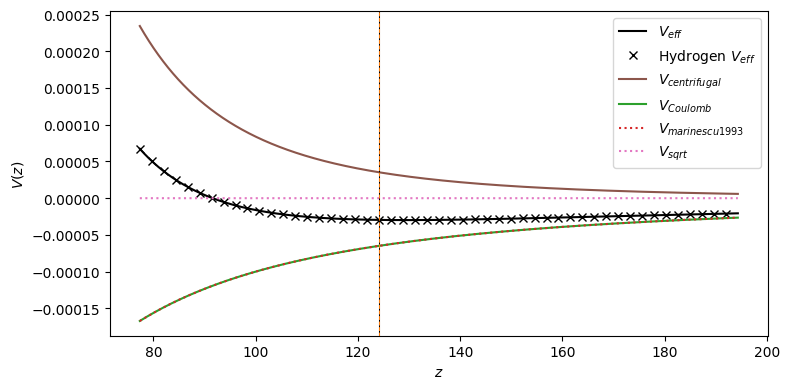

In [5]:
fig, ax = plt.subplots(figsize=(8, 4))

new_z_list = np.linspace(0.75 * np.sqrt(state.radial.grid.x_min), np.sqrt(state.radial.grid.x_max), 10_000)
new_x_list = np.power(new_z_list, 2)
hydrogen_v_phys = hydrogen.radial.model.calc_total_effective_potential(new_x_list)

ax.plot(new_z_list, state.radial.model.calc_total_effective_potential(new_x_list), "k-", label=r"$V_{eff}$")
ax.plot(new_z_list[::200], hydrogen_v_phys[::200], "kx", lw=0.75, label=r"Hydrogen $V_{eff}$")

if True:
    ax.plot(
        new_z_list,
        state.radial.model.calc_effective_potential_centrifugal(new_x_list),
        "C5-",
        label=r"$V_{centrifugal}$",
    )
    ax.plot(new_z_list, state.radial.model.calc_potential_coulomb(new_x_list), "C2-", label=r"$V_{Coulomb}$")
    ax.plot(
        new_z_list,
        state.radial.model.calc_model_potential_marinescu_1993(new_x_list),
        "C3:",
        label=r"$V_{marinescu 1993}$",
    )
    ax.plot(new_z_list, state.radial.model.calc_effective_potential_sqrt(new_x_list), "C6:", label=r"$V_{sqrt}$")

ax.axvline(turning_points["classical"], color="k", ls="-", lw=0.75, label=None)
ax.axvline(turning_points["hydrogen"], color="C1", ls="--", lw=0.75, label=None)

ax.set_xlabel(r"$z$")
ax.set_ylabel(r"$V(z)$")
ax.legend(loc="upper right")

fig.tight_layout()
plt.show()